# 手書き数字認識問題を解く
- 使用するデータはMNIST。
- 隠れ層を１層入れたニューラルネットを使って、手書き数字認識をする。
    - [入力] 手書き数字の画像データ
    - [隠れ層] 500次元
    - [出力] 数字ラベル

# データ読み込み&ニューラルネット用に変換

In [1]:
import numpy as np

f = np.load('mnist.npz')
x_train = f['x_train']
y_train = f['y_train']
x_test = f['x_test']
y_test = f['y_test']

# 28✖️28ピクセルの画像を784次元ベクトルに変換　＆　[0,1]に正規化
X_TRAIN = np.reshape(x_train, (60000, 784)) / 255.
X_TEST = np.reshape(x_test, (10000, 784)) / 255.

# one-hotベクトルに変換
Y_TRAIN = np.eye(10)[y_train]
Y_TEST = np.eye(10)[y_test]

# Kerasを使ってニューラルネットを組む

- __x__→__h__→__y__とする。
- 中間層の出力にかける活性化関数はReLU (Rectified Linear Unit)にする。

In [2]:
from keras.layers import Input, Dense

x = Input(shape=(784,))
h = Dense(500, activation='relu')(x)
y = Dense(10, activation='softmax')(h)

Using TensorFlow backend.


In [3]:
from keras.models import Model

mlp = Model(inputs=x, outputs=y)

In [4]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


## モデル構成を可視化
- graphvizとpydotが必要。
- condaを使ったインストール方法は、  
(python2)  
`conda install graphviz pydot`   
(python3)  
`conda install graphviz pydotplus` 

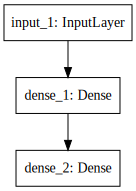

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(mlp).create(prog='dot', format='svg'))

In [7]:
mlp.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc'],
)

# 訓練

In [8]:
hist = mlp.fit(
    x = X_TRAIN,
    y = Y_TRAIN,
    epochs=30,
    validation_split=0.1,
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 7s - loss: 0.2171 - acc: 0.9360 - val_loss: 0.1038 - val_acc: 0.9688
Epoch 2/30
54000/54000 [==============================] - 7s - loss: 0.0871 - acc: 0.9736 - val_loss: 0.0773 - val_acc: 0.9765
Epoch 3/30
54000/54000 [==============================] - 6s - loss: 0.0563 - acc: 0.9821 - val_loss: 0.0734 - val_acc: 0.9782
Epoch 4/30
54000/54000 [==============================] - 6s - loss: 0.0385 - acc: 0.9878 - val_loss: 0.0757 - val_acc: 0.9778
Epoch 5/30
54000/54000 [==============================] - 6s - loss: 0.0279 - acc: 0.9912 - val_loss: 0.0651 - val_acc: 0.9813
Epoch 6/30
54000/54000 [==============================] - 7s - loss: 0.0208 - acc: 0.9930 - val_loss: 0.0728 - val_acc: 0.9805
Epoch 7/30
54000/54000 [==============================] - 7s - loss: 0.0185 - acc: 0.9941 - val_loss: 0.0897 - val_acc: 0.9780
Epoch 8/30
54000/54000 [==============================] - 6s -

# 訓練結果の確認

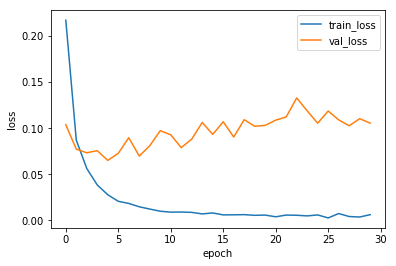

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.epoch, hist.history['loss'], label='train_loss')
plt.plot(hist.epoch, hist.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

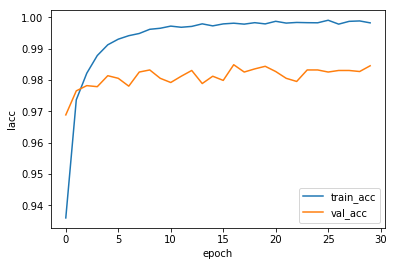

In [10]:
plt.plot(hist.epoch, hist.history['acc'], label='train_acc')
plt.plot(hist.epoch, hist.history['val_acc'], label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('lacc')

In [11]:
mlp.evaluate(x=X_TEST, y=Y_TEST)

 8960/10000 [=========================>....] - ETA: 0s

[0.120176409252216, 0.98170000000000002]

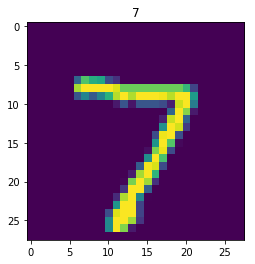

In [13]:
pred = mlp.predict(X_TEST).argmax(axis=1)

plt.imshow(x_test[0])
plt.title(str(pred[0]))